Лабораторная работа "Построение моделей"

В данной работе предлагается решить задачу мультиклассовой классификации для датасета флагов различных стран
https://archive.ics.uci.edu/ml/datasets/Flags

1. Загрузить данные из папки Data Folder
2. Провести описательный анализ предложенных данных
3. Предложить стратегию по работе с категориальными переменными
4. Провести углубленный анализ данных (корреляции переменных, визуализация взаимосвязей)
5. Следует ли увеличивать/уменьшать размерность признакового множества (какой подход выдает лучшие результаты)
6. Следует ли балансировать классы путем oversampling/undersampling? (улучшает ли подход результаты)
7. Сделать кросс-валидацию данных с использованием подхода K-fold (n_folds=3)
8. Решить задачу мультиклассовой классификации и предсказать религию страны (religion) по деталям ее флага
9. Рассчитать Feature Importances для переменных модели
10. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall
11. Построить Confusion Matrix для ваших результатов
12. Загрузить ipython notebook с результатами работы на github репозиторий

In [243]:
# extract column names from file
import re

with open('flag.names', 'r') as f:
    names = f.readlines()
new_names = []
for n in names[28:-2]:
    new_n = n[6:]
    if new_n[0] != ' ':
        new_names.append(re.search('([a-z]+)', new_n).groups()[0])

In [244]:
# 1. Загрузить данные из папки Data Folder
# read data
import numpy as np
import pandas as pd

data=pd.read_csv('flag.data', header=None)
data.columns = new_names
data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [245]:
# 2. Провести описательный анализ предложенных данных
data.info()
# Nulls - Ok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
name          194 non-null object
landmass      194 non-null int64
zone          194 non-null int64
area          194 non-null int64
population    194 non-null int64
language      194 non-null int64
religion      194 non-null int64
bars          194 non-null int64
stripes       194 non-null int64
colours       194 non-null int64
red           194 non-null int64
green         194 non-null int64
blue          194 non-null int64
gold          194 non-null int64
white         194 non-null int64
black         194 non-null int64
orange        194 non-null int64
mainhue       194 non-null object
circles       194 non-null int64
crosses       194 non-null int64
saltires      194 non-null int64
quarters      194 non-null int64
sunstars      194 non-null int64
crescent      194 non-null int64
triangle      194 non-null int64
icon          194 non-null int64
animate       194 non-null int64
te

In [246]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
landmass,1,-0.615759,0.0132794,0.10594,0.4964,0.325073,-0.13929,-0.0633749,-0.0628559,0.0933998,0.0262258,-0.177366,-0.0804649,-0.00413409,-0.0582433,0.0207444,0.0656963,-0.0311029,-0.00342909,-0.00453749,-0.0348434,0.168438,-0.0331536,0.0303591,-0.118856,-0.110743
zone,-0.615759,1,-0.0254307,-0.124111,-0.618387,-0.320537,0.0854462,0.00235891,0.173567,-0.0322692,0.0694044,0.206066,0.164392,-0.0352961,0.0268466,0.0522386,-0.042542,0.101441,0.179667,0.1533,0.121754,-0.159272,0.060416,-0.0486917,0.106034,0.0376024
area,0.0132794,-0.0254307,1,0.51903,-0.0278689,0.0879408,0.00124334,0.0284537,-0.162227,-0.00547,-0.0813284,-0.0804392,0.0145004,-0.0981354,-0.119825,-0.0507183,-0.00565154,-0.057888,-0.0254919,-0.00196772,0.340572,-0.00504897,-0.0753664,0.0265932,-0.0515393,0.0244233
population,0.10594,-0.124111,0.51903,1,0.0628035,0.172731,-0.041392,0.0300999,-0.115052,-0.0246482,-0.0479176,-0.060222,-0.00218436,-0.0926403,-0.103552,0.0504975,0.0512574,-0.0763046,-0.0590613,-0.0413486,0.191377,-0.0155437,-0.0781564,0.0179663,-0.0822586,-0.0251941
language,0.4964,-0.618387,-0.0278689,0.0628035,1,0.422315,-0.0498618,0.105409,-0.197883,-0.0110476,0.00604562,-0.262201,-0.189429,-0.0468232,0.0944647,-0.0644074,0.0984756,-0.210966,-0.296106,-0.220535,-0.126241,0.193375,-0.0648452,0.0283364,-0.133756,-0.0829768
religion,0.325073,-0.320537,0.0879408,0.172731,0.422315,1,-0.0600003,0.103222,-0.01772,0.121721,0.128843,-0.154891,0.0233342,-0.167605,0.0740548,-0.0512153,0.12326,-0.225238,-0.133373,-0.135713,-0.0750813,0.0531454,0.0568679,0.0557138,-0.00274112,-0.0551576
bars,-0.13929,0.0854462,0.00124334,-0.041392,-0.0498618,-0.0600003,1,-0.273371,-0.0645739,-0.0170928,0.116905,-0.12851,0.0371175,-0.198697,-0.0290763,0.0468415,-0.0966496,-0.144432,-0.14007,-0.150604,-0.114667,0.0217428,-0.132973,-0.00259808,0.0162599,0.0677093
stripes,-0.0633749,0.00235891,0.0284537,0.0300999,0.105409,0.103222,-0.273371,1,0.0382782,0.0142104,-0.085367,0.126104,-0.0319868,0.125907,0.0918138,-0.106477,-0.0874789,-0.19055,-0.190735,0.0919409,0.215486,-0.010242,-0.00571929,-0.107426,-0.157922,-0.111564
colours,-0.0628559,0.173567,-0.162227,-0.115052,-0.197883,-0.01772,-0.0645739,0.0382782,1,0.311759,0.428388,0.294779,0.500073,0.214334,0.375794,0.477655,0.178062,0.253827,0.37881,0.187861,0.0310082,-0.173644,0.143252,0.505614,0.544576,0.398483
red,0.0933998,-0.0322692,-0.00547,-0.0246482,-0.0110476,0.121721,-0.0170928,0.0142104,0.311759,1,0.0311689,-0.20401,0.0817694,-0.0334825,0.14223,-0.0557833,0.108639,0.102772,0.122031,0.119914,0.0197257,-0.0914584,0.0257598,0.0975127,0.133648,0.0175075


In [247]:
# 3. Предложить стратегию по работе с категориальными переменными
# Choose categorical colunms and use LabelEncoder for them
data_categ = data.select_dtypes(include=["object_"])
cols = data_categ.columns
print(cols)

Index(['name', 'mainhue', 'topleft', 'botright'], dtype='object')


In [248]:
# class to help transform data
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [249]:
# backup data
data_backup = data.copy()
data_backup.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [250]:
# print(cols)
data = MultiColumnLabelEncoder(columns = cols).fit_transform(data)
data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,0,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,0,4
1,1,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,5,6
2,2,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,3,7
3,3,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,1,6
4,4,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,1,6


In [251]:
# 4. Провести углубленный анализ данных (корреляции переменных, визуализация взаимосвязей)
from pandas_profiling import ProfileReport
ProfileReport(data)

C:\Users\User\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,30
Number of observations,194
Total Missing (%),0.0%
Total size in memory,42.6 KiB
Average record size in memory,224.7 B
Numeric,17
Categorical,0
Boolean,13
Date,0
Text (Unique),0
Rejected,0


In [252]:
# split data
from sklearn.model_selection import train_test_split

X = data.loc[:, data.columns !='religion']
y = data[['religion']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.head()
# 42 - The Ultimate Question of Life, the Universe, and Everything

,name,landmass,zone,area,population,language,bars,stripes,colours,red,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
38,38,2,4,1139,28,2,0,3,3,1,...,0,0,0,0,0,0,0,0,2,6
31,31,1,4,9976,24,1,2,0,2,1,...,0,0,0,0,0,0,1,0,5,6
173,173,2,4,5,1,1,0,0,3,1,...,0,0,0,0,1,0,0,0,6,7
12,12,1,4,19,0,1,0,3,3,0,...,0,0,0,0,1,0,0,0,1,1
109,109,6,1,0,0,10,0,0,3,0,...,0,0,1,0,0,1,0,0,1,1


In [253]:
# 5. Следует ли увеличивать/уменьшать размерность признакового множества (какой подход выдает лучшие результаты)
# In my experience PolynomialFeatures good work in linear models, but for ensemble models it's doesn't matter. 
# Let's check it
from sklearn.preprocessing import PolynomialFeatures

# Let's use Ridge, because this linear model have regularization and was recommended as default linear model.  

# linear models sensitive to normalization, let's scale it
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create linear model
from sklearn.linear_model import RidgeClassifier

ridge = RidgeClassifier().fit(X_train_scaled, y_train)

print(f"Правильность на тестовом наборе без взаимодействий: {round(ridge.score(X_test_scaled, y_test),3)}")

for _ in range(1,6):
    # create PolynomialFeatures 
    poly = PolynomialFeatures(degree=_).fit(X_train_scaled)
    X_train_poly = poly.transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    ridge = RidgeClassifier().fit(X_train_poly, y_train)
    print(f"Правильность на тестовом наборе с взаимодействиями: {round(ridge.score(X_test_poly, y_test),3)}, degree= {_} ")

# Conclusion:
# For this dataset rising degree bad for result

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:937: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:937: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:937: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:937: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

Правильность на тестовом наборе без взаимодействий: 0.441
Правильность на тестовом наборе с взаимодействиями: 0.441, degree= 1 
Правильность на тестовом наборе с взаимодействиями: 0.441, degree= 2 
Правильность на тестовом наборе с взаимодействиями: 0.373, degree= 3 
Правильность на тестовом наборе с взаимодействиями: 0.339, degree= 4 


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:937: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Правильность на тестовом наборе с взаимодействиями: 0.373, degree= 5 


In [254]:
# 6. Следует ли балансировать классы путем oversampling/undersampling? (улучшает ли подход результаты)
# I think yes, it's important for some algoritms, but we can use classification_report to check any category
# Let's check
# Good link: https://towardsdatascience.com/machine-learning-multiclass-classification-with-imbalanced-data-set-29f6a177c1a

values, counts = np.unique(data['religion'], return_counts=True)
print(f'religion type: {values}, number_of_countries{counts}')
#  the classes are not represented equally

religion type: [0 1 2 3 4 5 6 7], number_of_countries[40 60 36  8  4 27 15  4]


In [255]:
# Let's looks problem
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=42)
# stratify=y,
# X_train.info()
forest = RandomForestClassifier(n_estimators=50, random_state=2)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print("Правильность на обучающем наборе: {:.3f}".format(forest.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(forest.score(X_test, y_test)))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# The problem is bad precision and recall on minority classes like (3,4,5,6)
# Let's check what is working better oversampling/undersampling?

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.673
              precision    recall  f1-score   support

           0       0.64      0.88      0.74         8
           1       0.89      0.84      0.86        19
           2       0.45      0.83      0.59         6
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.57      0.50      0.53         8
           6       1.00      0.20      0.33         5

    accuracy                           0.67        49
   macro avg       0.51      0.46      0.44        49
weighted avg       0.70      0.67      0.65        49



C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [256]:
X_train.shape, y_train.shape

((145, 29), (145, 1))

In [257]:
y_train_for_SMOTE=y_train['religion']
y_train_for_SMOTE.shape, X_train.shape

((145,), (145, 29))

In [258]:
# oversampling
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# set number of samples by hand
samp2 = {0 : 60, 1 : 60,2 : 60,3 : 60,4 : 60,5 : 60,6 : 60,7 : 60}

ros = RandomOverSampler(sampling_strategy = samp2)
X_ros, y_ros = ros.fit_resample(X_train, y_train_for_SMOTE)
X_ros.shape, y_ros.shape
print('Resampled dataset shape %s' % Counter(y_ros))

# Create new model
forest_ros = RandomForestClassifier(n_estimators=50, random_state=2)
forest.fit(X_ros, y_ros)
y_pred = forest.predict(X_test)
print("Правильность на обучающем наборе: {:.3f}".format(forest.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(forest.score(X_test, y_test)))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# Conclusion
# RandomOverSampler don't give result. It's should be used more complicated oversampling methods, 
# but they(SMOTE) give error because small number of some categories 
# Let's check RandomUnderSampler

Resampled dataset shape Counter({1: 60, 5: 60, 3: 60, 0: 60, 2: 60, 6: 60, 7: 60, 4: 60})
Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.633
              precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.88      0.74      0.80        19
           2       0.42      0.83      0.56         6
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.62      0.62      0.62         8
           6       0.33      0.20      0.25         5

    accuracy                           0.63        49
   macro avg       0.42      0.45      0.42        49
weighted avg       0.64      0.63      0.62        49



C:\Users\User\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:285: UserWarning: After over-sampling, the number of samples (60) in class 0 will be larger than the number of samples in the majority class (class #1 -> 41)
  n_samples_majority,
C:\Users\User\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:285: UserWarning: After over-sampling, the number of samples (60) in class 1 will be larger than the number of samples in the majority class (class #1 -> 41)
  n_samples_majority,
C:\Users\User\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:285: UserWarning: After over-sampling, the number of samples (60) in class 2 will be larger than the number of samples in the majority class (class #1 -> 41)
  n_samples_majority,
C:\Users\User\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:285: UserWarning: After over-sampling, the number of samples (60) in class 3 will be larger than the number of samples in the majority class (class #1 -> 41)
  n_samples_ma

In [259]:
# undersampling
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# set number of samples by hand
samp2rus = {0 : 4, 1 : 4,2 : 4,3 : 4,4 : 4,5 : 4,6 : 4,7 : 60}

rus = RandomUnderSampler( random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train_for_SMOTE)
print('Resampled dataset shape %s' % Counter(y_rus))
print(X_rus.shape, y_rus.shape)

# Create new model
forest_rus = RandomForestClassifier(n_estimators=50, random_state=2)
forest.fit(X_rus, y_rus)
y_pred = forest.predict(X_test)
print("Правильность на обучающем наборе: {:.3f}".format(forest.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(forest.score(X_test, y_test)))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# # Conclusion
# RandomOverSampler don't give result. We lose information when run RandomUnderSampler

# Main conclusion:
#     (улучшает ли подход результаты) - not

Resampled dataset shape Counter({0: 2, 1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2})
(16, 29) (16,)
Правильность на обучающем наборе: 0.331
Правильность на тестовом наборе: 0.204
              precision    recall  f1-score   support

           0       0.24      0.62      0.34         8
           1       0.11      0.05      0.07        19
           2       0.44      0.67      0.53         6
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         0

    accuracy                           0.20        49
   macro avg       0.10      0.17      0.12        49
weighted avg       0.14      0.20      0.15        49



C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [260]:
# 7. Сделать кросс-валидацию данных с использованием подхода K-fold (n_folds=3)
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=42)
# stratify=y,
# X_train.info()
forest = RandomForestClassifier(n_estimators=50, random_state=2)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
scores = cross_val_score(forest, X, y, cv=3) 
print(forest.__class__.__name__,scores.mean())

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


RandomForestClassifier 0.6030448717948719


C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [261]:
# looks data detail
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
name          194 non-null int32
landmass      194 non-null int64
zone          194 non-null int64
area          194 non-null int64
population    194 non-null int64
language      194 non-null int64
religion      194 non-null int64
bars          194 non-null int64
stripes       194 non-null int64
colours       194 non-null int64
red           194 non-null int64
green         194 non-null int64
blue          194 non-null int64
gold          194 non-null int64
white         194 non-null int64
black         194 non-null int64
orange        194 non-null int64
mainhue       194 non-null int32
circles       194 non-null int64
crosses       194 non-null int64
saltires      194 non-null int64
quarters      194 non-null int64
sunstars      194 non-null int64
crescent      194 non-null int64
triangle      194 non-null int64
icon          194 non-null int64
animate       194 non-null int64
text

In [206]:
# 8. Решить задачу мультиклассовой классификации и предсказать религию страны (religion) по деталям ее флага
# data.info()
# select only data with flag information
X = data.iloc[:, 7: ]
y = data['religion']
X

,bars,stripes,colours,red,green,blue,gold,white,black,orange,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,0,3,5,1,1,0,1,1,1,0,...,0,0,1,0,0,1,0,0,0,4
1,0,0,3,1,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,5,6
2,2,0,3,1,1,0,0,1,0,0,...,0,0,1,1,0,0,0,0,3,7
3,0,0,5,1,0,1,1,1,0,1,...,0,0,0,0,1,1,1,0,1,6
4,3,0,3,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,0,0,3,1,0,1,0,1,0,0,...,0,1,5,0,0,0,0,0,1,6
190,0,3,4,1,0,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,6
191,0,0,4,1,1,0,1,0,0,1,...,0,0,0,0,0,1,1,0,3,4
192,3,0,4,1,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,3,2


In [209]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=42)
# stratify=y,
# X_train.info()
forest = RandomForestClassifier(n_estimators=50, random_state=2)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print("Правильность на обучающем наборе: {:.3f}".format(forest.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(forest.score(X_test, y_test)))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# looks to model in test data, accuracy reduse much - it's overfitting
# Let's tune model - try to rise regularisation -> max_depth: making it smaller will reduce the 
# overfitting and introduce bias, increasing it will do the opposite

# from link: https://stackoverflow.com/questions/20463281/how-do-i-solve-overfitting-in-random-forest-of-python-sklearn
# n_estimators: @Falcon is wrong, in general the more trees the less likely the algorithm is to overfit. So try increasing this. The lower this number, the closer the model is to a decision tree, with a restricted feature set.
# max_features: try reducing this number (try 30-50% of the number of features). This determines how many features each tree is randomly assigned. The smaller, the less likely to overfit, but too small will start to introduce under fitting.
# max_depth: Experiment with this. This will reduce the complexity of the learned models, lowering over fitting risk. Try starting small, say 5-10, and increasing you get the best result.
# min_samples_leaf: Try setting this to values greater than one. This has a similar effect to the max_depth parameter, it means the branch will stop splitting once the leaves have that number of samples each.


Правильность на обучающем наборе: 0.986
Правильность на тестовом наборе: 0.429
              precision    recall  f1-score   support

           0       0.25      0.50      0.33         8
           1       0.69      0.47      0.56        19
           2       0.50      0.83      0.62         6
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.40      0.25      0.31         8
           6       0.33      0.20      0.25         5

    accuracy                           0.43        49
   macro avg       0.31      0.32      0.30        49
weighted avg       0.47      0.43      0.42        49



C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [219]:
# set hiperparameters for optimization
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [1, 10, 100],
              'max_depth': [1,  5, 10, 15, 30],
             'min_samples_split':[2,5,10],
             'min_samples_leaf':[1, 2,3,5,10],
             'min_weight_fraction_leaf':[0,0.1,0.2,0.3,0.4,0.5]}

grid = GridSearchCV(forest, param_grid, cv=5)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)


print("Наилучшие значения параметров: {}".format(grid.best_params_))
print("Наилучшее значение кросс-валидац. правильности: {:.2f}".format(grid.best_score_))
print("Наилучшая модель:\n{}".format(grid.best_estimator_))

best_estimator = grid.best_estimator_
y_pred = best_estimator.predict(X_test)
print("Правильность на обучающем наборе: {:.3f}".format(grid.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(forest.score(X_test, y_test)))

# from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Наилучшие значения параметров: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0, 'n_estimators': 100}
Наилучшее значение кросс-валидац. правильности: 0.52
Наилучшая модель:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)
Правильность на обучающем наборе: 0.648
Правильность на тестовом наборе: 0.429
              precision    recall  f1-score   support

           0       0.31      0.62      0.42         8
           1       0.72      0.68      0.70        19

C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


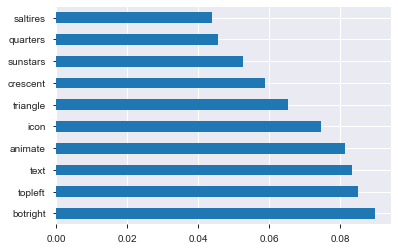

In [241]:
# 9. Рассчитать Feature Importances для переменных модели
import matplotlib.pyplot as plt
%matplotlib inline            

np.sort(best_estimator.feature_importances_)[::-1]

(pd.Series(np.sort(best_estimator.feature_importances_), index=X_train.columns)
   .nlargest(10)
   .plot(kind='barh'))


In [242]:
# 10. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall

# calculates accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % accuracy)

# calculates f1-score
from sklearn.metrics import f1_score
score = f1_score(y_test, y_pred, average='macro')
print('F-Measure: %.3f' % score)

# calculates precision 
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='macro')
print('Precision: %.3f' % precision)

# calculates recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='macro')
print('Recall: %.3f' % recall)

Accuracy: 0.510
F-Measure: 0.291
Precision: 0.303
Recall: 0.342


C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [224]:
# 11. Построить Confusion Matrix для ваших результатов
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 5,  1,  2,  0,  0,  0,  0],
       [ 4, 13,  2,  0,  0,  0,  0],
       [ 1,  0,  5,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  1,  0],
       [ 1,  2,  3,  0,  0,  2,  0],
       [ 4,  1,  0,  0,  0,  0,  0]], dtype=int64)

In [ ]:
# 12. Загрузить ipython notebook с результатами работы на github репозиторий
# Done